In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('XOM_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2015-04-08 20:21:06,0.0000,Analysis - Shell's BG purchase could be cataly...,0.000,1.000,0.000,0
2015-04-17 21:57:33,0.2960,Exclusive - Anadarko considers selling Mozambi...,0.000,0.686,0.314,1
2015-07-31 23:12:49,0.0772,Tumbling oil prices slam profit at Exxon Mobil...,0.208,0.560,0.232,0
2015-10-30 18:15:02,0.2382,Exxon 3rd-qtr profit falls 47 pct but beats ex...,0.000,0.804,0.196,1
2016-02-02 20:20:41,0.5106,"Exxon, tops in stock buybacks, now saving its ...",0.000,0.708,0.292,1
2016-02-07 08:14:33,-0.6249,"As Big Oil shrinks, boards plot different path...",0.291,0.709,0.000,-1
2016-03-23 21:32:04,0.3400,Exclusive - Exxon Mobil must allow climate cha...,0.000,0.673,0.327,1
2016-04-29 12:09:44,0.4404,Exxon Mobil first-quarter profit drops 63 percent,0.000,0.674,0.326,1
2016-06-23 16:07:44,-0.3400,California pipeline leaks 700 barrels of oil -...,0.231,0.769,0.000,-1


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2015-04-08,0.0,0.0,1.0,0.0,0.0
2015-04-09,0.0,0.0,0.0,0.0,0.0
2015-04-10,0.0,0.0,0.0,0.0,0.0
2015-04-11,0.0,0.0,0.0,0.0,0.0
2015-04-12,0.0,0.0,0.0,0.0,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,-0.1027,0.153,0.726,0.121,-1.0
2016-07-02,-0.0516,0.330,0.446,0.223,0.0
2016-07-03,0.0000,0.000,0.000,0.000,0.0
2016-07-04,0.0000,0.000,0.000,0.000,0.0
2016-07-05,0.0000,0.000,0.000,0.000,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.050142,0.045924,0.659851,0.081634,0.130217
std,0.141399,0.059269,0.351011,0.077182,0.333352
min,-0.648600,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.696281,0.000000,0.000000
50%,0.024129,0.030770,0.820217,0.080646,0.065591
75%,0.119032,0.070000,0.871946,0.124000,0.312500
max,0.778300,0.451000,1.000000,0.573000,1.000000


### Fundamental Data

In [13]:
fund = pd.read_csv('XOM_Fund.csv')
fund.tail()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
749,08/07/2016,3.474110e+11,2.0365,32.9925,0.035357,0.030310,10923623770,2.582624e+09,0.059999,-0.41058,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
750,07/07/2016,3.452570e+11,2.0239,32.7880,0.035577,0.030499,10923623770,2.582624e+09,0.059999,-0.41058,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
751,06/07/2016,3.494540e+11,2.0485,33.1865,0.035150,0.030133,10923623770,2.582624e+09,0.059999,-0.41058,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
752,05/07/2016,3.454800e+11,2.0252,32.8091,0.035554,0.030479,10923623770,2.582624e+09,0.059999,-0.41058,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
753,01/07/2016,3.485260e+11,2.0430,33.0984,0.035244,0.030213,10923623770,2.582624e+09,0.059999,-0.41058,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495


In [14]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [15]:

fund.index =fund['date']

In [16]:
fund=fund.loc['2019-07-01':'2016-07-01']

In [17]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 35 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null int64
freecashflow                      754 non-null float64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null int64
currentratio                      754 non-null float64
debttoequity                      754 non-null f

### Price analysis

In [20]:
df_price = pd.read_csv('XOM_price.csv')

In [21]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [22]:
#df_price = df_price.drop(['date'], axis=1)

In [23]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-07,0,70.50,70.8750,69.400,69.86,14968499.0,70.50,2019-08-07,daily,70.8750,False,69.400,69.86,15231052.0
2019-08-06,1,70.96,71.0100,70.280,70.29,12282362.0,70.96,2019-08-06,daily,71.0100,False,70.280,70.29,12282362.0
2019-08-05,2,70.28,70.9200,69.610,70.78,19080930.0,70.28,2019-08-05,daily,70.9200,False,69.610,70.78,19080930.0
2019-08-02,3,71.75,73.2600,71.180,72.61,21376742.0,71.75,2019-08-02,daily,73.2600,False,71.180,72.61,21376742.0
2019-08-01,4,72.46,74.2684,72.265,73.74,17132815.0,72.46,2019-08-01,daily,74.2684,False,72.265,73.74,17132815.0


In [24]:
df_price=df_price[::-1]

In [25]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-30 to 2019-08-07
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [26]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = df_price.adj_close.rolling(window=n).mean()
    
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [27]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-30 to 2019-08-07
Data columns (total 22 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
ma14           1187 non-null float64
rsi14          1186 non-null float64
ma30           1171 non-null float64
rsi30          1170 non-null float64
ma50           1151 non-null float64
rsi50          1150 non-null float64
ma200          1001 non-null float64
rsi200         1000 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), o

In [28]:
df_price[:100]

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,open,volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
date,,,,,,,,,,,,,,,,,,,,,
2014-10-30,1199,79.204395,79.388884,78.172935,78.718016,9767918.0,94.45,2014-10-30,daily,94.6700,...,93.87,9767918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-31,1198,81.099598,81.250544,79.086993,79.657231,17493736.0,96.71,2014-10-31,daily,96.8900,...,94.99,17493736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,1197,79.883649,81.426647,79.497900,80.973810,13410561.0,95.26,2014-11-03,daily,97.1000,...,96.56,13410561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,1196,79.263096,79.573373,78.734787,79.246324,13498531.0,94.52,2014-11-04,daily,94.8900,...,94.50,13498531.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,1195,79.724318,80.311328,79.372112,79.967508,12480033.0,95.07,2014-11-05,daily,95.7700,...,95.36,12480033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,1194,80.722235,80.856408,79.061836,79.816563,14731392.0,96.26,2014-11-06,daily,96.4200,...,95.18,14731392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-07,1193,81.583767,82.065212,80.848931,80.916502,13233484.0,96.59,2014-11-07,daily,97.1600,...,95.80,13233484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-10,1192,81.321929,82.014534,81.144555,81.820267,9087594.0,96.28,2014-11-10,daily,97.1000,...,96.87,9087594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-11,1191,81.431732,81.516196,80.756020,80.899609,7990045.0,96.41,2014-11-11,daily,96.5100,...,95.78,7990045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_price=df_price.loc['2016-07-01':'2019-07-01']

In [30]:
df_price.ma200

date
2016-07-01    72.368781
2016-07-05    72.459797
2016-07-06    72.563277
2016-07-07    72.658659
2016-07-08    72.759434
2016-07-11    72.863671
2016-07-12    72.970757
2016-07-13    73.075366
2016-07-14    73.183015
2016-07-15    73.289817
2016-07-18    73.389309
2016-07-19    73.488502
2016-07-20    73.577414
2016-07-21    73.661943
2016-07-22    73.742506
2016-07-25    73.809351
2016-07-26    73.869625
2016-07-27    73.930476
2016-07-28    73.987999
2016-07-29    74.040572
2016-08-01    74.075081
2016-08-02    74.109118
2016-08-03    74.140825
2016-08-04    74.178940
2016-08-05    74.218104
2016-08-08    74.264530
2016-08-09    74.299840
2016-08-10    74.327857
2016-08-11    74.364885
2016-08-12    74.407541
                ...    
2019-05-20    76.880184
2019-05-21    76.878618
2019-05-22    76.872214
2019-05-23    76.857055
2019-05-24    76.838224
2019-05-28    76.814530
2019-05-29    76.790551
2019-05-30    76.766009
2019-05-31    76.739629
2019-06-03    76.720009
2019-06-04 

In [31]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           754 non-null float64
rsi50          754 non-null float64
ma200          754 non-null float64
rsi200         754 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [32]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [33]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
df_price.index =df_price['date']

In [35]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,779,83.419269,83.543722,82.734776,82.992572,9946278.0,93.84,2016-07-01,daily,93.98,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
2016-07-05,778,82.690328,83.205921,82.005835,82.779224,10744051.0,93.02,2016-07-05,daily,93.60,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
2016-07-06,777,83.641507,83.668176,82.174736,82.983683,13144408.0,94.09,2016-07-06,daily,94.12,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
2016-07-07,776,82.636991,83.997088,82.094730,83.863745,12240670.0,92.96,2016-07-07,daily,94.49,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495
2016-07-08,775,83.152583,83.365932,82.601433,83.019241,9807645.0,93.54,2016-07-08,daily,93.78,...,31676000000,3.424730e+11,1.655980e+11,44471000000,10676000000,10676000000,-18477000000,-4240000000,34182000000,0.7495


In [36]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2016-07-01    779
2016-07-05    778
2016-07-06    777
2016-07-07    776
2016-07-08    775
2016-07-11    774
2016-07-12    773
2016-07-13    772
2016-07-14    771
2016-07-15    770
2016-07-18    769
2016-07-19    768
2016-07-20    767
2016-07-21    766
2016-07-22    765
2016-07-25    764
2016-07-26    763
2016-07-27    762
2016-07-28    761
2016-07-29    760
2016-08-01    759
2016-08-02    758
2016-08-03    757
2016-08-04    756
2016-08-05    755
2016-08-08    754
2016-08-09    753
2016-08-10    752
2016-08-11    751
2016-08-12    750
             ... 
2019-05-20     55
2019-05-21     54
2019-05-22     53
2019-05-23     52
2019-05-24     51
2019-05-28     50
2019-05-29     49
2019-05-30     48
2019-05-31     47
2019-06-03     46
2019-06-04     45
2019-06-05     44
2019-06-06     43
2019-06-07     42
2019-06-10     41
2019-06-11     40
2019-06-12     39
2019-06-13     38
2019-06-14     37
2019-06-17     36
2019-06-18     35
2019-06-19     34
2019-06-20  

In [37]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 57 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null flo

In [38]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [39]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [40]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [41]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [42]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,779,83.419269,83.543722,82.734776,82.992572,9946278.0,93.84,2016-07-01,daily,93.98,...,3.167600e+10,3.424730e+11,1.655980e+11,4.447100e+10,1.067600e+10,1.067600e+10,-1.847700e+10,-4.240000e+09,3.418200e+10,0.7495
2016-07-05,778,82.690328,83.205921,82.005835,82.779224,10744051.0,93.02,2016-07-05,daily,93.60,...,3.167600e+10,3.424730e+11,1.655980e+11,4.447100e+10,1.067600e+10,1.067600e+10,-1.847700e+10,-4.240000e+09,3.418200e+10,0.7495
2016-07-06,777,83.641507,83.668176,82.174736,82.983683,13144408.0,94.09,2016-07-06,daily,94.12,...,3.167600e+10,3.424730e+11,1.655980e+11,4.447100e+10,1.067600e+10,1.067600e+10,-1.847700e+10,-4.240000e+09,3.418200e+10,0.7495
2016-07-07,776,82.636991,83.997088,82.094730,83.863745,12240670.0,92.96,2016-07-07,daily,94.49,...,3.167600e+10,3.424730e+11,1.655980e+11,4.447100e+10,1.067600e+10,1.067600e+10,-1.847700e+10,-4.240000e+09,3.418200e+10,0.7495
2016-07-08,775,83.152583,83.365932,82.601433,83.019241,9807645.0,93.54,2016-07-08,daily,93.78,...,3.167600e+10,3.424730e+11,1.655980e+11,4.447100e+10,1.067600e+10,1.067600e+10,-1.847700e+10,-4.240000e+09,3.418200e+10,0.7495


### EDA

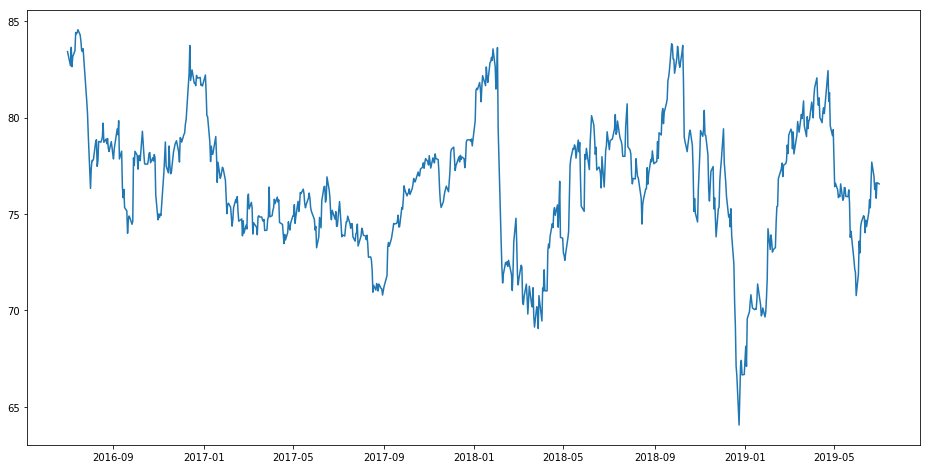

In [43]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

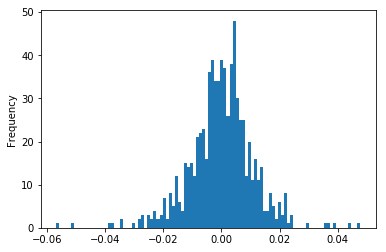

In [44]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

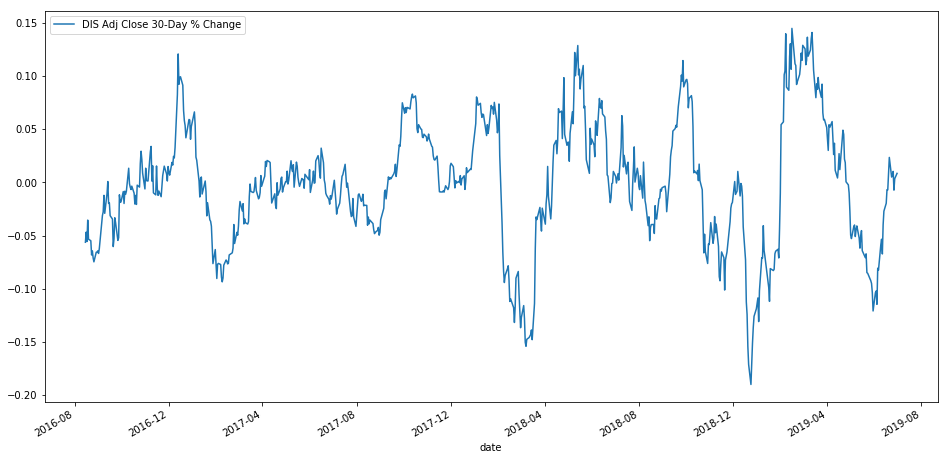

In [45]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(30).plot(label='DIS Adj Close 30-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.011571
5d_close_future_pct     -0.011571             1.000000


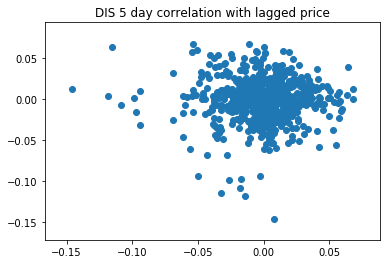

In [46]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000             0.005232
5d_close_future_pct  0.005232             1.000000


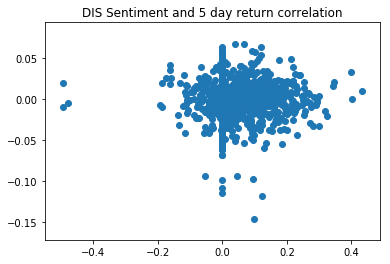

In [47]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000             0.007161
1d_close_future_pct      0.007161             1.000000


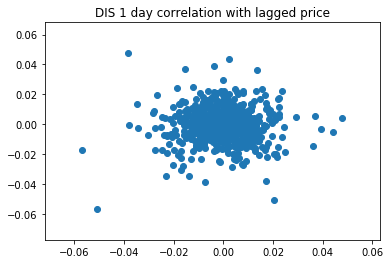

In [48]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000            -0.025156
1d_close_future_pct -0.025156             1.000000


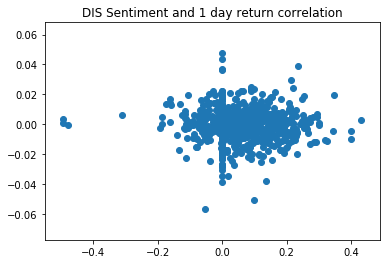

In [49]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct              1.000000             -0.276073
30d_close_future_pct      -0.276073              1.000000


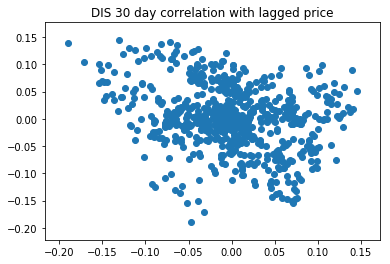

In [50]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('DIS 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound               1.00000              -0.01473
30d_close_future_pct  -0.01473               1.00000


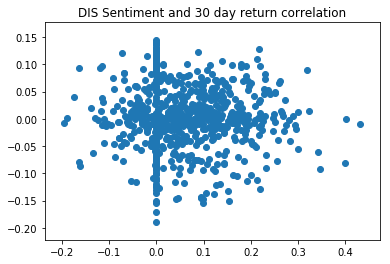

In [51]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [52]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [53]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 65 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [54]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [55]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [56]:
feature_names = ['30d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:
    
# Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['30d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [57]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


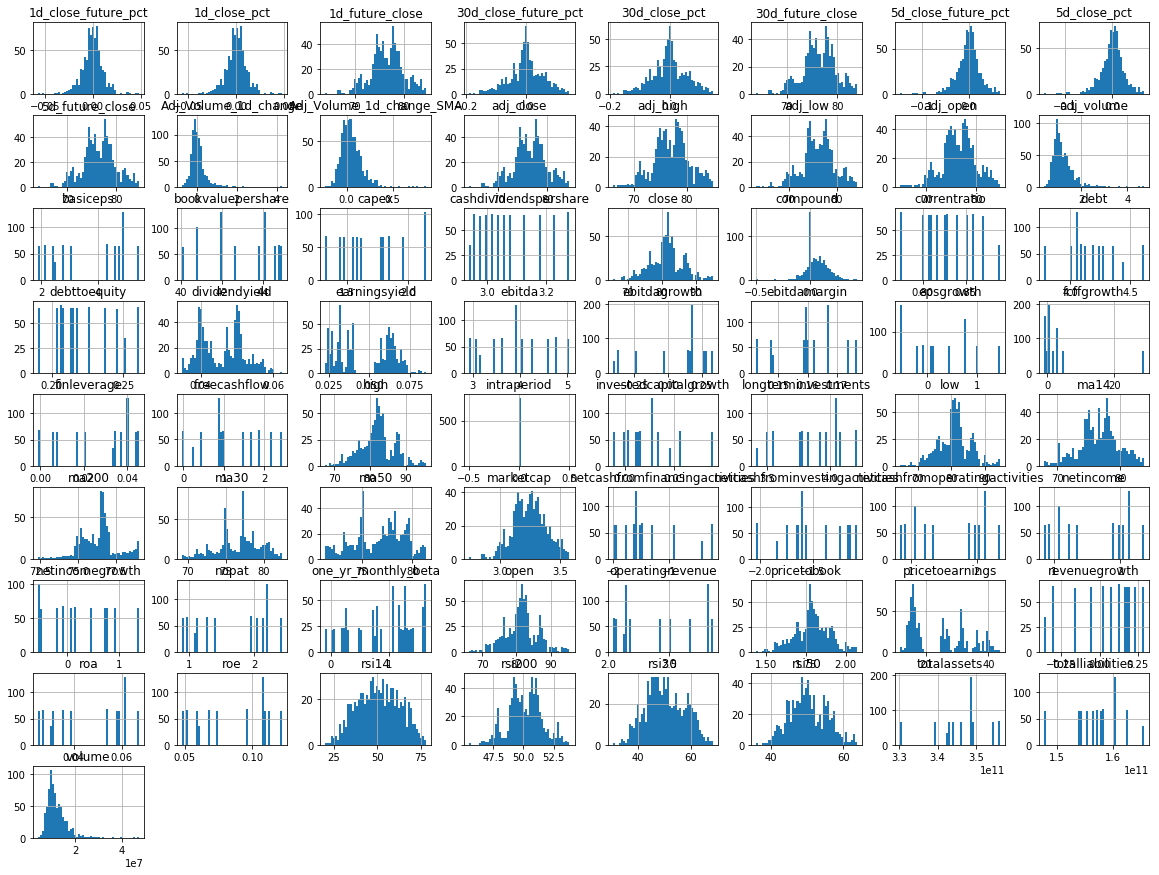

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [59]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 67 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [60]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'capex', 'currentratio', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_future_close',
       '5d_close_future_pct', '5d_close_pct', '1d_future_close',
       '1d_clos

In [61]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['30d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['30d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                30d_close_future_pct  30d_close_pct      ma14  \
30d_close_future_pct                        1.000000      -0.259260 -0.685331   
30d_close_pct                              -0.259260       1.000000  0.366475   
ma14                                       -0.685331       0.366475  1.000000   
rsi14                                      -0.256087       0.800053  0.178298   
ma30                                       -0.643748      -0.013261  0.891223   
rsi30                                      -0.396129       0.837944  0.437931   
ma50                                       -0.529667      -0.347169  0.663680   
rsi50                                      -0.480941       0.794136  0.584678   
ma200                                      -0.199274      -0.103562  0.143270   
rsi200                                     -0.625858       0.684899  0.801780   
compound                                   -0.012173       0.110204  0.041976   
marketcap                   

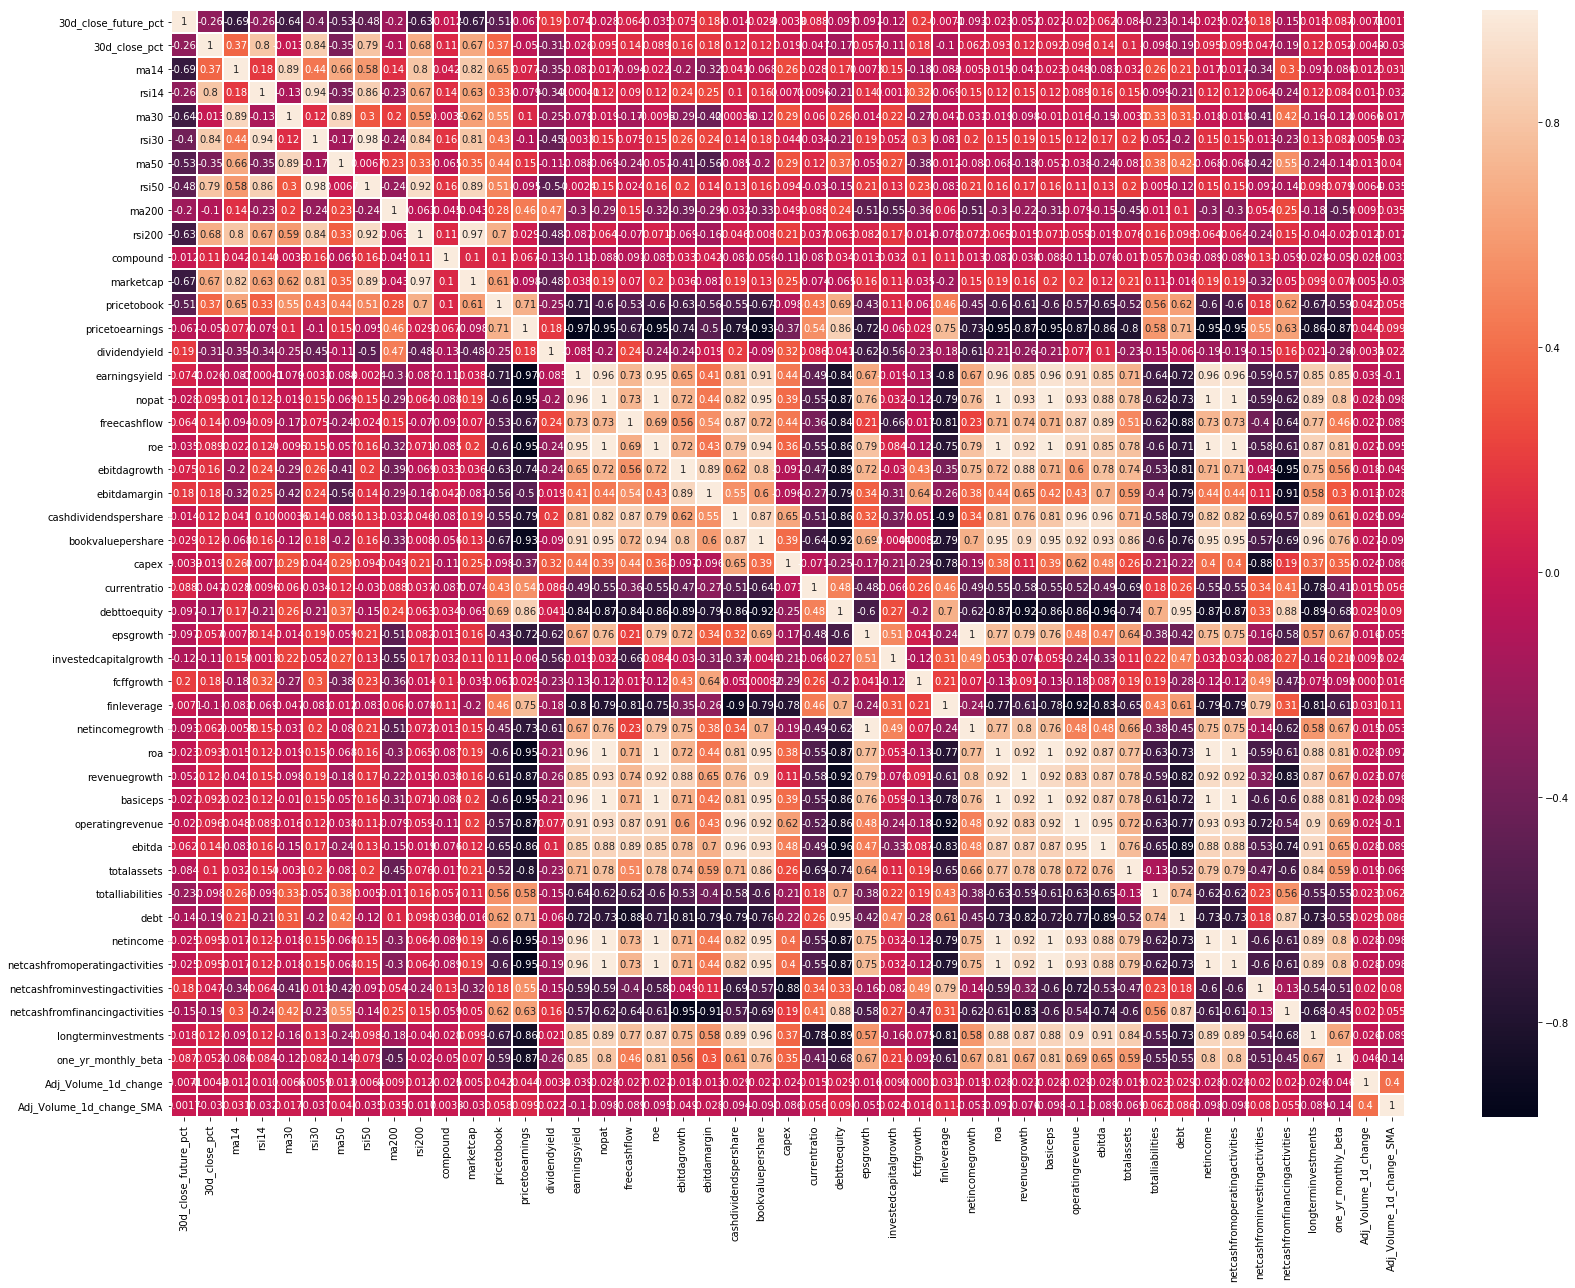

<Figure size 432x288 with 0 Axes>

In [62]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [63]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 36 columns


In [64]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma14', 'ma30', 'ma50',
       'ma200', 'compound', 'pricetobook', 'dividendyield', 'freecashflow',
       'capex', 'currentratio', 'investedcapitalgrowth', 'fcffgrowth',
       'netincomegrowth', 'totalassets', 'totalliabilities', 'debt',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', '1d_future_close', '1d_close_future_pct',
       '1d_close_pct', '30d_future_close', '30d_close_future_pct',
       '30d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [65]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [66]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [67]:
#30 day future return features
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '30d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [68]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['30d_close_future_pct']





In [69]:
targets.describe()

count    694.000000
mean       0.000154
std        0.058564
min       -0.190135
25%       -0.034295
50%        0.000651
75%        0.037558
max        0.145041
Name: 30d_close_future_pct, dtype: float64

In [70]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [71]:
train_size

555

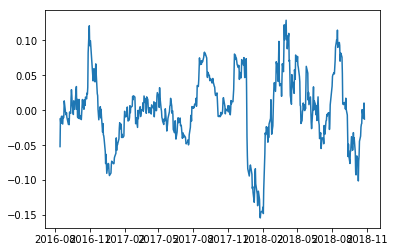

In [72]:
plt.plot(train_targets)

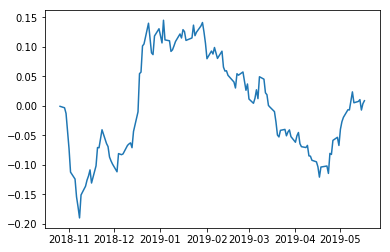

In [73]:
plt.plot(test_targets)

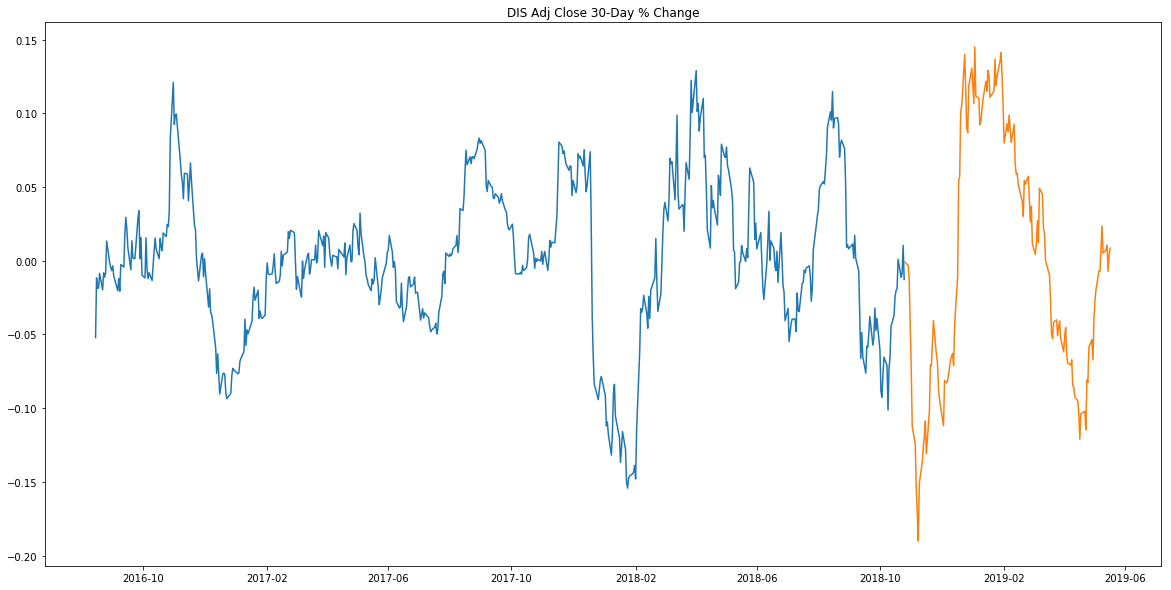

In [74]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.title('DIS Adj Close 30-Day % Change')
plt.show()

In [77]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                             
Dep. Variable:     30d_close_future_pct   R-squared:                       0.775
Model:                              OLS   Adj. R-squared:                  0.766
Method:                   Least Squares   F-statistic:                     83.49
Date:                  Sun, 01 Sep 2019   Prob (F-statistic):          1.39e-156
Time:                          14:15:30   Log-Likelihood:                 1288.0
No. Observations:                   555   AIC:                            -2530.
Df Residuals:                       532   BIC:                            -2431.
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

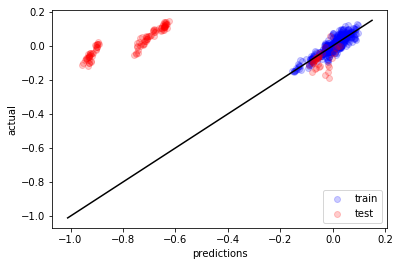

In [78]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [79]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [80]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.7753562930733479
-246.08014454250764


In [81]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.0005648896977812731
1.7413195120754508


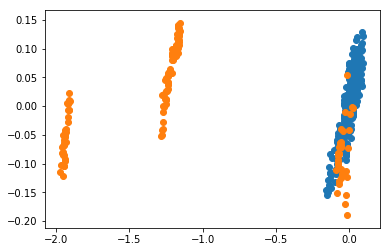

In [82]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [84]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [85]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [86]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.5572295310648985
-5.1804048115834895


In [87]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.001113391867526861
0.04355695805044272
Train Root mean squared error: 0.03336752714132201
Test Root mean squared error: 0.20870303795211684


In [88]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
#test

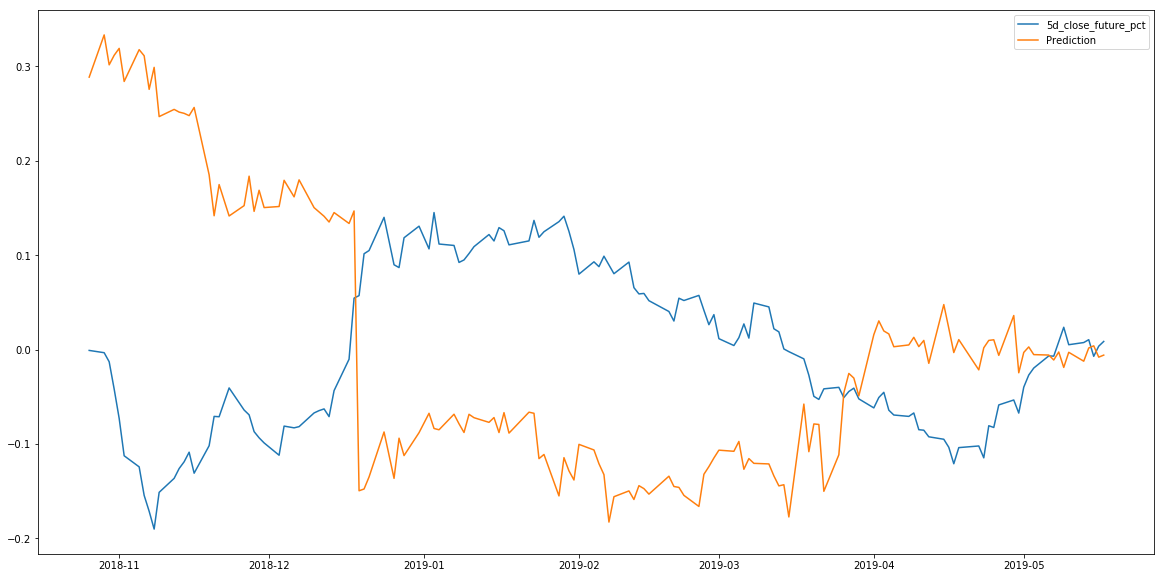

In [89]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

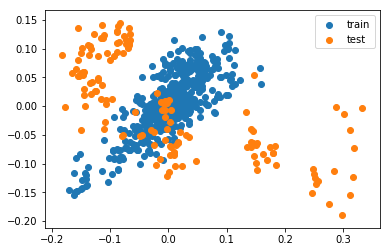

In [90]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -0.2% of the variance in the test set.
The model has ignored 33 out of 33 features.


In [93]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.0020292615892152366
0.04355695805044272
0.20870303795211684


In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([5,4,3,2,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge(normalize=True)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(train_features, train_targets)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([5.e+00, 4.e+00, 3.e+00, 2.e+00, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
-0.1752025652426134
5.0


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [97]:

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)
ridge=pd.DataFrame(data=test_scores, index=alphas)

ridge

,0
20.0000,1.563813e-01
10.0000,2.441822e-01
5.0000,3.366211e-01
4.0000,3.635111e-01
3.0000,3.944898e-01
2.0000,4.299776e-01
1.5000,4.491892e-01
1.0000,4.686043e-01
0.5000,4.877440e-01
0.1000,5.448670e-01


In [98]:
from sklearn.linear_model import Ridge



ridgeReg = Ridge(alpha=0.01, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.7524239002275339
Test r2: 0.5794650357150575


In [99]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=10, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.6241770204745326
Test r2: 0.5794650357150575


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [100]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=3,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.5572295310648985
Test r2: -5.1804048115834895
0.04355695805044272
0.20870303795211684


In [101]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(X_calib, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  9

R2: -11020.757
MSE: 77.677
SEP: 6.773
RPD: 0.012
Bias: -5.639


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


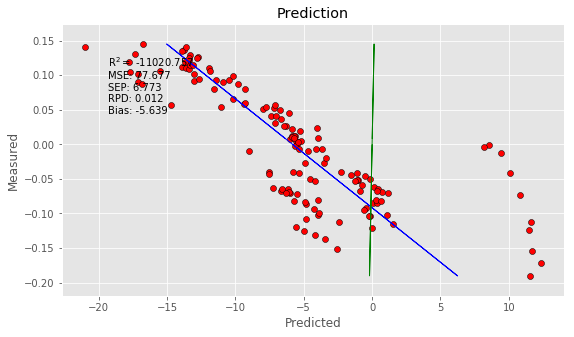

In [103]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

[45.4  64.22 75.92 80.56 84.9  89.01 92.02 94.09 95.9  97.4  98.08 98.59
 98.95 99.27 99.45 99.6  99.73 99.82 99.89 99.92 99.95 99.97 99.98 99.98
 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98]
0.7479956541498395
-0.10934809461648376
0.007818230341479632
0.08842075741294932


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


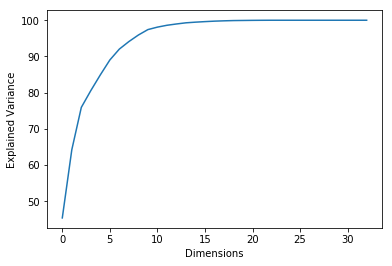

In [104]:
### PCA

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=33)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=20)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [365]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999976940119637
-0.28403318611287864


In [366]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999976940119637
-0.2808750893256635


In [367]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.771914177642885
-0.016959447126311922 

max_depth= 5
0.9034076522100398
-0.16025020159765635 

max_depth= 10
0.995490351040635
-0.22540262776404663 



In [368]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-2.4020470017515945
-0.5980198066175322 

max_depth= 5
-3.6079547651745667
-1.001378618606271 

max_depth= 10
-3.6842292995275763
-1.5884503622196808 



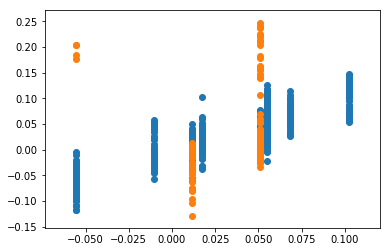

In [369]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [370]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9913357293000662
-0.10957684772503785


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [371]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.038035188225919114 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [372]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.7556402492090449
-0.038035188225919114


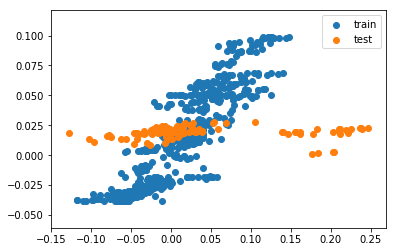

In [373]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

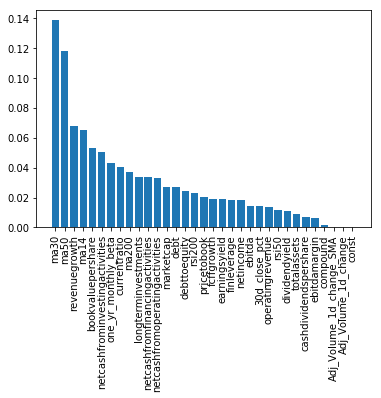

In [374]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [375]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.7957046036052657
-0.017901040572412708


In [376]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

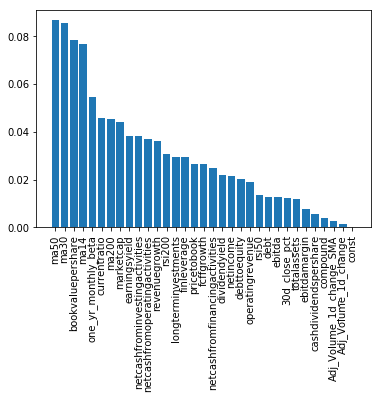

In [377]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


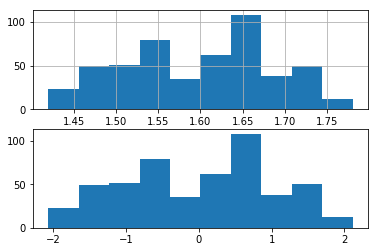

In [378]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [379]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.9317659576869242
-0.630399377849898

n_neighbors = 3
train, test scores
0.9090730896542718
-0.6260916395921101

n_neighbors = 4
train, test scores
0.8884637861778049
-0.5868726986966077

n_neighbors = 5
train, test scores
0.8721960533784154
-0.5890761762982011

n_neighbors = 6
train, test scores
0.8614490352746476
-0.5628634408443494

n_neighbors = 7
train, test scores
0.8506060115617263
-0.553120466332671

n_neighbors = 8
train, test scores
0.8391599435065195
-0.5466255704290381

n_neighbors = 9
train, test scores
0.8308651617575968
-0.5442418193721711

n_neighbors = 10
train, test scores
0.8245369898223559
-0.5366823813221224

n_neighbors = 11
train, test scores
0.8225269590619334
-0.5204910085552157

n_neighbors = 12
train, test scores
0.8171820266310599
-0.5180851705770195

n_neighbors = 13
train, test scores
0.8140928545513028
-0.5250102088459461

n_neighbors = 14
train, test scores
0.8088126290402509
-0.5182121523710597

n_neighbors = 15
train

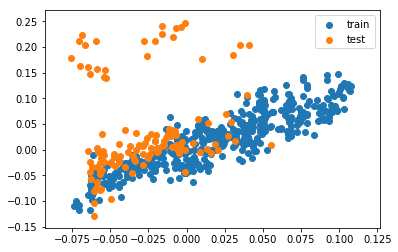

In [380]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [381]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
507/507 [==============================] - 0s 555us/step - loss: 0.1316
Epoch 2/25
507/507 [==============================] - 0s 24us/step - loss: 0.0191
Epoch 3/25
507/507 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 4/25
507/507 [==============================] - 0s 21us/step - loss: 0.0046
Epoch 5/25
507/507 [==============================] - 0s 20us/step - loss: 0.0033
Epoch 6/25
507/507 [==============================] - 0s 21us/step - loss: 0.0025
Epoch 7/25
507/507 [==============================] - 0s 25us/step - loss: 0.0022
Epoch 8/25
507/507 [==============================] - 0s 29us/step - loss: 0.0020
Epoch 9/25
507/507 [==============================] - 0s 26us/step - loss: 0.0016
Epoch 10/25
507/507 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 11/25
507/507 [==============================] - 0s 21us/step - loss: 0.0013
Epoch 12/25
507/507 [==============================] - 0s 27us/step - loss: 0.0011
Epoch 13/25


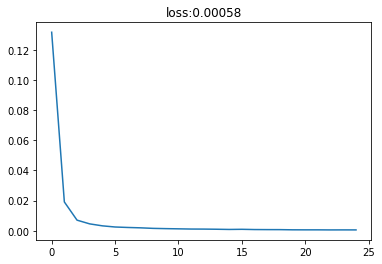

In [382]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.7934770929967104
-4.874692922616724


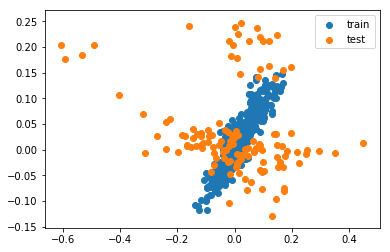

In [383]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [384]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c3fbfab70>


Epoch 1/25
507/507 [==============================] - 0s 474us/step - loss: 2.5723
Epoch 2/25
507/507 [==============================] - 0s 26us/step - loss: 0.2812
Epoch 3/25
507/507 [==============================] - 0s 27us/step - loss: 0.1442
Epoch 4/25
507/507 [==============================] - 0s 28us/step - loss: 0.0846
Epoch 5/25
507/507 [==============================] - 0s 25us/step - loss: 0.0643
Epoch 6/25
507/507 [==============================] - 0s 29us/step - loss: 0.0457
Epoch 7/25
507/507 [==============================] - 0s 25us/step - loss: 0.0350
Epoch 8/25
507/507 [==============================] - 0s 23us/step - loss: 0.0303
Epoch 9/25
507/507 [==============================] - 0s 28us/step - loss: 0.0362
Epoch 10/25
507/507 [==============================] - 0s 23us/step - loss: 0.0249
Epoch 11/25
507/507 [==============================] - 0s 25us/step - loss: 0.0260
Epoch 12/25
507/507 [==============================] - 0s 25us/step - loss: 0.0184
Epoch 13/25


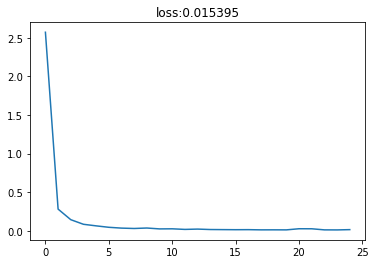

In [385]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.0075613526064625125
-2.933362662015907


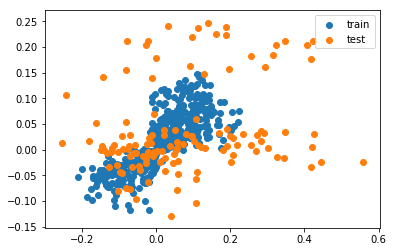

In [386]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
507/507 [==============================] - 0s 583us/step - loss: 0.1197
Epoch 2/25
507/507 [==============================] - 0s 23us/step - loss: 0.0762
Epoch 3/25
507/507 [==============================] - 0s 24us/step - loss: 0.0433
Epoch 4/25
507/507 [==============================] - 0s 28us/step - loss: 0.0308
Epoch 5/25
507/507 [==============================] - 0s 30us/step - loss: 0.0249
Epoch 6/25
507/507 [==============================] - 0s 25us/step - loss: 0.0206
Epoch 7/25
507/507 [==============================] - 0s 28us/step - loss: 0.0204
Epoch 8/25
507/507 [==============================] - 0s 32us/step - loss: 0.0166
Epoch 9/25
507/507 [==============================] - 0s 28us/step - loss: 0.0129
Epoch 10/25
507/507 [==============================] - 0s 26us/step - loss: 0.0122
Epoch 11/25
507/507 [==============================] - 0s 33us/step - loss: 0.0110
Epoch 12/25
507/507 [==============================] - 0s 31us/step - loss: 0.0115
Epoch 13/25


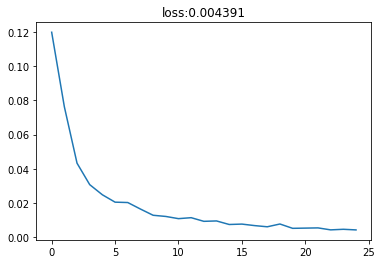

In [387]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [388]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[ 0.07031336 -0.22929911 -0.1933192  -0.19491701 -0.18464427]


0.7945373472966464
-1.0940187250447884


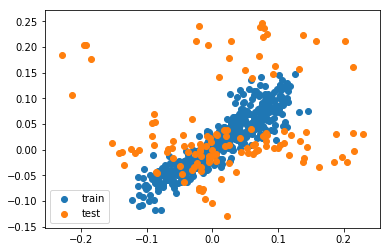

In [389]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()